## Introduction
Using TensorFlow and a dataset found on the web I was able to train a model to detect hand written letters. This is a model that determines hand written numbers using a large dataset to train it.

The image below shows the basic model used. I also used a model with 3 hidden layers.
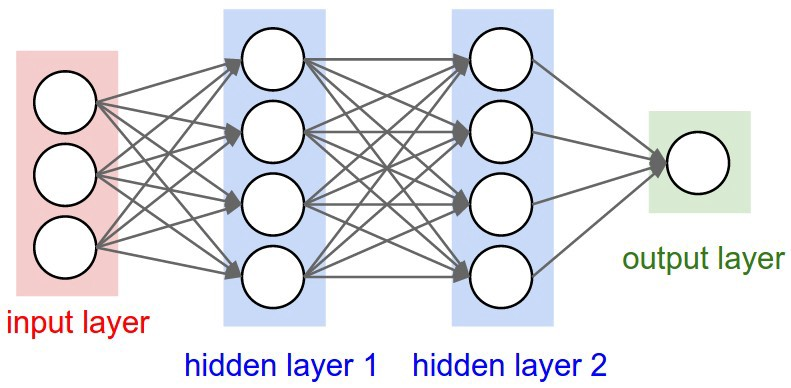
Reference: https://medium.com/coinmonks/the-mathematics-of-neural-network-60a112dd3e05
![title](https://miro.medium.com/max/700/1*3w6P6OHcU3j0T_lRUmnjQw.jpeg)
![title](https://miro.medium.com/max/960/1*0lejoYyyQWjYzEP_BNW2nw.jpeg)

## Problems
To be applied to each neuron:
\begin{align*}
\ f(b+\sum_{i=1}^{n} x_i w_i)
\end{align*}

b = bias

x = input to neuron

w = weights; each neuron will have a different weight; the larger the weight the larger we hold importance to that neuron.

n = the number of inputs from the incoming layer

i = a counter from 1to n

### Order of Operations
1. Multiply every neuron by its weight
2. Add all values up
3. Add bias for each neuron (There are A LOT of neurons!)

## Applications & Problems
See end of page

## Discussion
Increasing units in density may lead to higher accuracy. Increasing hidden layers may also lead to higher detection accuracy. The highest accuracy model I had was 2 layers with its density at 256. Taking a look at the results the models tend to struggle with numbers that have loops in the them such as 9 or 8. It does not identify them correctly sometimes. The model used ReLU or Rectified Linear Unit as this was suggested in a YouTube video by 3Blue1Brown called 'What is a Neural Network?'. Sigmoid was used in early networks but modern networks do not use it since ReLU is earlier to train. ReLu rises up after 0 where sigmoid in the example below rises earlier than that and not in a linear form.

![Title](https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png)

Reference: https://www.youtube.com/watch?v=aircAruvnKk

## Code

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [49]:
# Gets the data of hand written numbers
HAND_DATA = tf.keras.datasets.mnist

# Separates into training data vs testing data
# Most of the data is in the training set
(training1, training2), (testing1, testing2) = HAND_DATA.load_data()

# Scaling X data
# Not scaling Y data since that is just an integer 0-9. which are just labels
training1 = tf.keras.utils.normalize(training1, axis = 1)
testing1 = tf.keras.utils.normalize(testing1, axis = 1)

In [50]:
def create_model(units, layers_count):
    # Creating our model
    model = tf. keras.models.Sequential()
    # Images are 28 by 28 pixels
    model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

    # Hidden layers
    # How many layers do you want?
    for i in range(layers_count):
        model.add(tf.keras.layers.Dense(units = units, activation = tf.nn.relu))

    # Output layer
    model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(training1, training2, epochs=3)
    accuracy, loss = model.evaluate(testing1, testing2)
    
    print(accuracy)
    print(loss)
    
    # If you want to save the model
    # model.save('digit.model')
    
    return model

In [54]:
# Create various models
model_list = []

# Creating 2 layer models with various units per layer
model_2_64 = create_model(64, 2)
model_2_128 = create_model(128, 2)
model_2_256 = create_model(256, 2)
model_list.append(model_2_64)
model_list.append(model_2_128)
model_list.append(model_2_256)

# Creating 3 layer models with various units per layer
model_3_64 = create_model(64, 3)
model_3_128 = create_model(128, 3)
model_3_256 = create_model(256, 3)
model_list.append(model_3_64)
model_list.append(model_3_128)
model_list.append(model_3_256)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5624 - accuracy: 0.8443
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1550 - accuracy: 0.9536
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9649
0.11308234930038452
0.964900016784668
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8646
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9666
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9727
0.08752534538507462
0.9726999998092651
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3956 - accuracy: 0.8824
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0870 - accuracy: 0.9729
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9700
0.09836579859256744


In [55]:
def predict(img_num, model):
    img = cv.imread('{}.png'.format(img_num))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(np.argmax(prediction))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

1


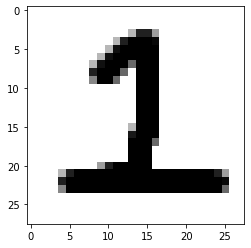

8


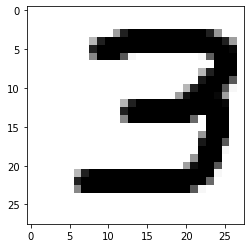

3


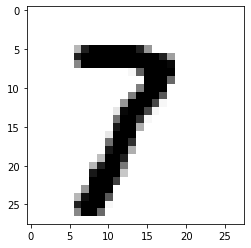

2


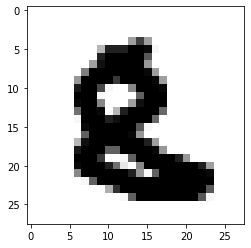

3


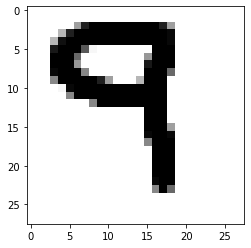

1


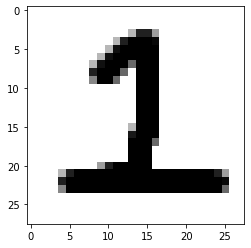

8


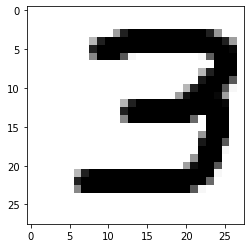

3


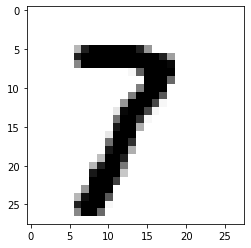

8


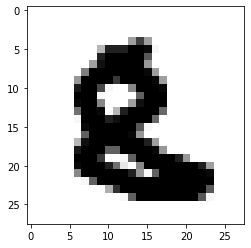

3


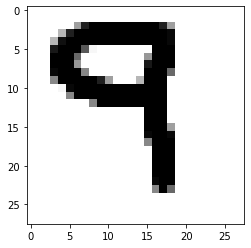

1


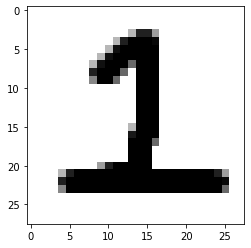

5


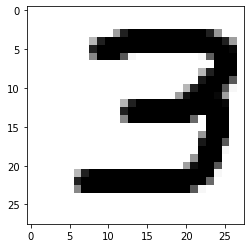

7


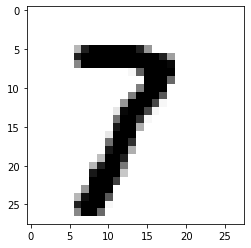

8


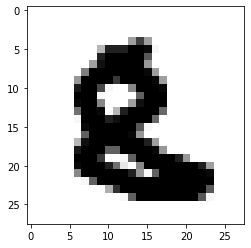

3


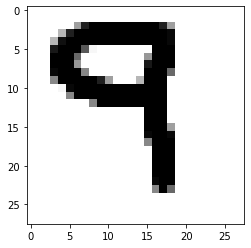

2


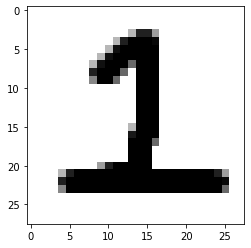

8


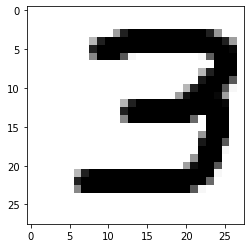

3


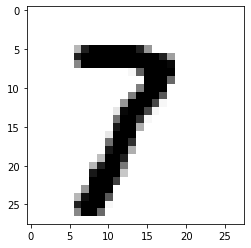

2


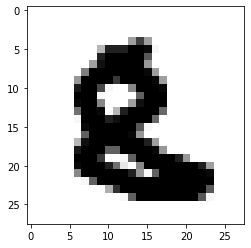

3


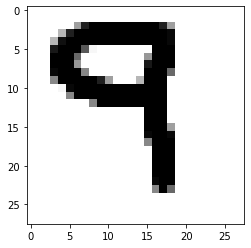

1


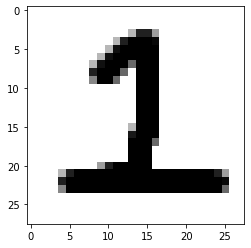

5


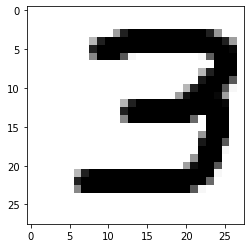

7


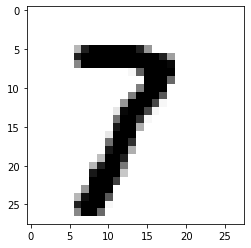

2


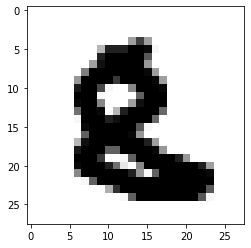

3


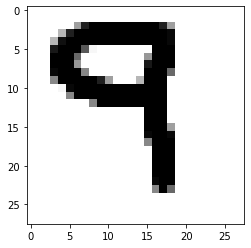

1


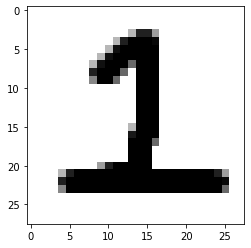

5


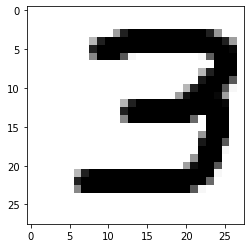

7


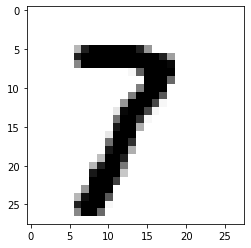

8


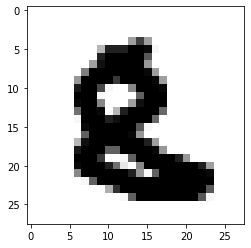

3


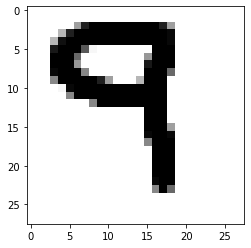

In [56]:
# Here are my results from my hand drawn numbers from MS paint.
for model in model_list:
    predict(1, model)
    predict(3, model)
    predict(7, model)
    predict(8, model)
    predict(9, model)